# Imports

In [1]:
import numpy as np
import os
import pandas as pd
import plotnine as gg
gg.theme_set(gg.theme_classic)

In [2]:
from Functions import bool_from_index, name_from_index, zscore
from Functions import get_ages_cols, get_category_cols, get_param_names

## Directories etc.

In [3]:
data_path = "C:/Users/maria/MEGAsync/SLCNdata/Meta"
data_save_path = os.path.join(data_path, "all_data")

In [4]:
param_names = get_param_names()
ages_cols = get_ages_cols()

In [5]:
wanted_cols = [
    
    # Participant info
    'ID', 'PreciseYrs', 'BMI', 'Gender', 'meanT', 'PDS', 'age_group',
    
    # Basic performance
    'bf_ACC', 'bf_RT', 'bf_RTsd', 'bf_ACC_delta', 'bf_RT_delta', 'bf_miss',
    'rl_ACC', 'rl_RT', 'rl_RTsd', 'rl_ACC_delta', 'rl_RT_delta', 'rl_miss',
    'ps_ACC', 'ps_RT', 'ps_RTsd', 'ps_ACC_delta', 'ps_RT_delta', 'ps_miss',

    # WSLS & stay
    'bf_WS', 'bf_LS', 'bf_stay_choice', 'bf_stay_motor',
    'rl_WS', 'rl_LS', 'rl_stay_choice', 'rl_stay_motor',
    'ps_WS', 'ps_LS', 'ps_stay', 

    # Parameters
    'bf_alpha', 'bf_nalpha', 'bf_1_over_beta', 'bf_forget',
    'rl_log_alpha', 'rl_log_nalpha', 'rl_forget', 'rl_rho', 'rl_epsilon_1_over_beta', 'rl_K',
    'ps_alpha', 'ps_nalpha', 'ps_1_over_beta_rl', 'ps_persev_rl', 'ps_1_over_beta_bf', 'ps_persev_bf', 'ps_p_switch', 'ps_p_reward',
    
    # Additional measures
    'rl_ACC_ns2_minus_ns5', 'rl_ACC_ns2_minus_ns5_delta', 'rl_RT_ns5_minus_ns2', #'rl_nsslope',
    'rl_lrn-ns_sig', 'rl_lrn-delay_sig', 'rl_lrn-pcor_sig', 'rl_lrn-pinc_sig',
    'ps_n_switches', 'ps_WLS', 'ps_LWS', 'ps_criterion_trial',
#     'bf_exponential', 'bf_regr_stuff'
]

# Format all_data

## Read in all_data and selected wanted columns

In [6]:
all_data = pd.read_csv(os.path.join(data_save_path, "all_data_raw.csv"), index_col=0)
all_data = all_data[wanted_cols]
all_data.to_csv(os.path.join(data_save_path, 'all_data.csv'))
all_data

,ID,PreciseYrs,BMI,Gender,meanT,PDS,age_group,bf_ACC,bf_RT,bf_RTsd,...,rl_ACC_ns2_minus_ns5_delta,rl_RT_ns5_minus_ns2,rl_lrn-ns_sig,rl_lrn-delay_sig,rl_lrn-pcor_sig,rl_lrn-pinc_sig,ps_n_switches,ps_WLS,ps_LWS,ps_criterion_trial
0,17,8.657084,18.200751,2.0,NaN,2.50,0.25,0.56667,1.33950,0.69630,...,-0.10000,0.47407,0.403200,0.481715,0.619654,0.448061,8,0.111111,1.000000,3.666667
1,18,12.637919,16.157863,2.0,NaN,2.25,0.50,0.80000,1.19270,0.53170,...,-0.17500,0.23346,0.493429,0.481895,0.620161,0.408597,8,0.870968,0.904762,4.222222
2,19,12.637919,14.316358,1.0,NaN,1.25,0.50,0.50000,0.83342,0.20657,...,-0.46667,0.22110,0.222423,0.378723,0.706754,0.476280,9,0.896552,0.941176,4.700000
3,20,14.543463,17.433768,1.0,120.649667,2.80,0.75,0.85000,0.99265,0.52117,...,0.29583,0.14064,0.340922,0.637521,0.651339,0.397819,8,1.000000,0.950000,4.000000
4,22,16.490075,22.709959,1.0,147.334443,3.00,1.00,0.73333,1.51800,1.03220,...,-0.12916,0.39956,0.562095,0.383703,0.624645,0.389760,7,0.708333,0.933333,4.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,465,22.333333,NaN,2.0,NaN,NaN,2.00,0.74167,1.11640,0.52359,...,0.03333,0.20789,0.470046,0.541425,0.612445,0.572510,8,0.777778,1.000000,3.625000
252,466,20.083333,NaN,1.0,NaN,NaN,2.00,0.60833,0.87618,0.32142,...,-0.04583,0.26891,0.381447,0.410091,0.538111,0.543934,8,0.785714,1.000000,3.750000
253,467,18.750000,NaN,2.0,NaN,NaN,2.00,0.80000,1.29200,0.83115,...,0.15416,0.25107,0.514913,0.453358,0.622050,0.424289,7,0.173913,1.000000,4.000000
254,468,21.833333,NaN,2.0,NaN,NaN,2.00,0.71667,2.12680,1.53770,...,0.07500,0.27425,0.414739,0.458744,0.640968,0.452268,7,0.590909,1.000000,5.000000


In [7]:
all_data_z = all_data[ages_cols + ['age_group']]
for col in [col for col in all_data.columns if not col in ages_cols + ['age_group']]:
    all_data_z[col] = zscore(all_data[col])
    
# Save
all_data_z.to_csv(os.path.join(data_save_path, 'all_data_z.csv'))
all_data_z

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ID,PreciseYrs,BMI,Gender,meanT,PDS,age_group,bf_ACC,bf_RT,bf_RTsd,...,rl_ACC_ns2_minus_ns5_delta,rl_RT_ns5_minus_ns2,rl_lrn-ns_sig,rl_lrn-delay_sig,rl_lrn-pcor_sig,rl_lrn-pinc_sig,ps_n_switches,ps_WLS,ps_LWS,ps_criterion_trial
0,17,8.657084,18.200751,2.0,NaN,2.50,0.25,-1.316224,0.404685,0.131150,...,-0.108705,1.066548,-0.102452,0.326867,-0.222466,-0.095960,0.752781,-1.539725,0.532526,-0.580315
1,18,12.637919,16.157863,2.0,NaN,2.25,0.50,0.243251,0.003448,-0.389745,...,-0.544114,-0.511964,0.624492,0.328429,-0.217127,-0.505188,0.752781,1.009316,0.019551,0.447258
2,19,12.637919,14.316358,1.0,NaN,1.25,0.50,-1.761817,-0.978544,-1.418655,...,-2.237392,-0.593052,-1.558897,-0.565175,0.695426,0.196667,1.879752,1.095141,0.215689,1.330971
3,20,14.543463,17.433768,1.0,120.649667,2.80,0.75,0.577429,-0.543333,-0.423068,...,2.189268,-1.120906,-0.604203,1.676349,0.111442,-0.616946,0.752781,1.442172,0.263214,0.036229
4,22,16.490075,22.709959,1.0,147.334443,3.00,1.00,-0.202342,0.892565,1.194143,...,-0.277992,0.577728,1.177706,-0.522046,-0.169872,-0.700514,-0.374190,0.463737,0.173444,0.498637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,465,22.333333,NaN,2.0,NaN,NaN,2.00,-0.146601,-0.205097,-0.415410,...,0.665336,-0.679715,0.436101,0.844031,-0.298441,1.194542,0.752781,0.696698,0.532526,-0.657383
252,466,20.083333,NaN,1.0,NaN,NaN,2.00,-1.037787,-0.861671,-1.055200,...,0.205776,-0.279396,-0.277704,-0.293493,-1.081799,0.898215,0.752781,0.723322,0.532526,-0.426179
253,467,18.750000,NaN,2.0,NaN,NaN,2.00,0.243251,0.274857,0.557898,...,1.366809,-0.396435,0.797576,0.081262,-0.197213,-0.342460,-0.374190,-1.329047,0.532526,0.036229
254,468,21.833333,NaN,2.0,NaN,NaN,2.00,-0.313690,2.556550,2.793854,...,0.907250,-0.244363,-0.009488,0.127907,0.002154,-0.052327,-0.374190,0.069822,0.532526,1.885860


In [8]:
def wsls_row_bool(feature):
    
    if ('WLS' in feature) or ('LWS' in feature):
        return True
    else:
        return False

# # Example use
# all_data_long.loc[all_data_long.feature.apply(wsls_row_bool), 'category'] = 'WSLS'
# all_data_long

In [9]:
def get_category_from_feature(data):
    
    category_cols = get_category_cols()
    category = data['feature'].apply(name_from_index, names=param_names + category_cols)
    category[category == 'p_switch_emp'] = 'ACC'
    category[category == 'p_reward'] = 'alpha'
    category[data.feature.apply(wsls_row_bool)] = 'XXS'

    return category

# # Example use
# get_category_from_feature(all_data_long)

In [10]:
# Melt all_data
all_data_long = all_data.melt(id_vars=ages_cols+['age_group'], var_name='feature')

# Add columns
all_data_long['category'] = get_category_from_feature(all_data_long)
all_data_long['task'] = all_data_long.feature.apply(lambda x : x[:2])
all_data_long['param'] = all_data_long.feature.apply(lambda x : x[3:])

# Save
all_data_long.to_csv(os.path.join(data_save_path, 'all_data_long.csv'))
all_data_long

,ID,PreciseYrs,BMI,Gender,meanT,PDS,age_group,feature,value,category,task,param
0,17,8.657084,18.200751,2.0,NaN,2.50,0.25,bf_ACC,0.56667,ACC,bf,ACC
1,18,12.637919,16.157863,2.0,NaN,2.25,0.50,bf_ACC,0.80000,ACC,bf,ACC
2,19,12.637919,14.316358,1.0,NaN,1.25,0.50,bf_ACC,0.50000,ACC,bf,ACC
3,20,14.543463,17.433768,1.0,120.649667,2.80,0.75,bf_ACC,0.85000,ACC,bf,ACC
4,22,16.490075,22.709959,1.0,147.334443,3.00,1.00,bf_ACC,0.73333,ACC,bf,ACC
...,...,...,...,...,...,...,...,...,...,...,...,...
14843,465,22.333333,NaN,2.0,NaN,NaN,2.00,ps_criterion_trial,3.62500,None,ps,criterion_trial
14844,466,20.083333,NaN,1.0,NaN,NaN,2.00,ps_criterion_trial,3.75000,None,ps,criterion_trial
14845,467,18.750000,NaN,2.0,NaN,NaN,2.00,ps_criterion_trial,4.00000,None,ps,criterion_trial
14846,468,21.833333,NaN,2.0,NaN,NaN,2.00,ps_criterion_trial,5.00000,None,ps,criterion_trial


In [11]:
# Melt all_data_z
all_data_long_z = all_data_z.melt(id_vars=ages_cols+['age_group'], var_name='feature')

# Add columns
all_data_long_z['category'] = get_category_from_feature(all_data_long_z)
all_data_long_z['task'] = all_data_long_z.feature.apply(lambda x : x[:2])
all_data_long_z['param'] = all_data_long_z.feature.apply(lambda x : x[3:])

# Save
all_data_long_z.to_csv(os.path.join(data_save_path, 'all_data_long_z.csv'))
all_data_long_z

,ID,PreciseYrs,BMI,Gender,meanT,PDS,age_group,feature,value,category,task,param
0,17,8.657084,18.200751,2.0,NaN,2.50,0.25,bf_ACC,-1.316224,ACC,bf,ACC
1,18,12.637919,16.157863,2.0,NaN,2.25,0.50,bf_ACC,0.243251,ACC,bf,ACC
2,19,12.637919,14.316358,1.0,NaN,1.25,0.50,bf_ACC,-1.761817,ACC,bf,ACC
3,20,14.543463,17.433768,1.0,120.649667,2.80,0.75,bf_ACC,0.577429,ACC,bf,ACC
4,22,16.490075,22.709959,1.0,147.334443,3.00,1.00,bf_ACC,-0.202342,ACC,bf,ACC
...,...,...,...,...,...,...,...,...,...,...,...,...
14843,465,22.333333,NaN,2.0,NaN,NaN,2.00,ps_criterion_trial,-0.657383,None,ps,criterion_trial
14844,466,20.083333,NaN,1.0,NaN,NaN,2.00,ps_criterion_trial,-0.426179,None,ps,criterion_trial
14845,467,18.750000,NaN,2.0,NaN,NaN,2.00,ps_criterion_trial,0.036229,None,ps,criterion_trial
14846,468,21.833333,NaN,2.0,NaN,NaN,2.00,ps_criterion_trial,1.885860,None,ps,criterion_trial


# Check that everything looks good

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


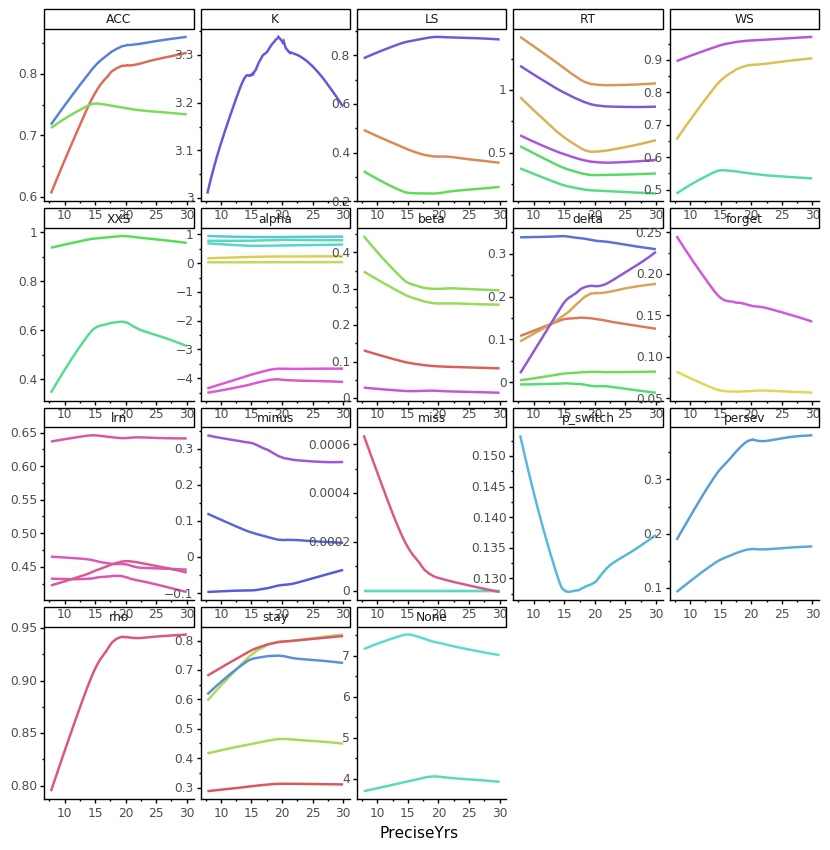

<ggplot: (-9223371909933079790)>


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


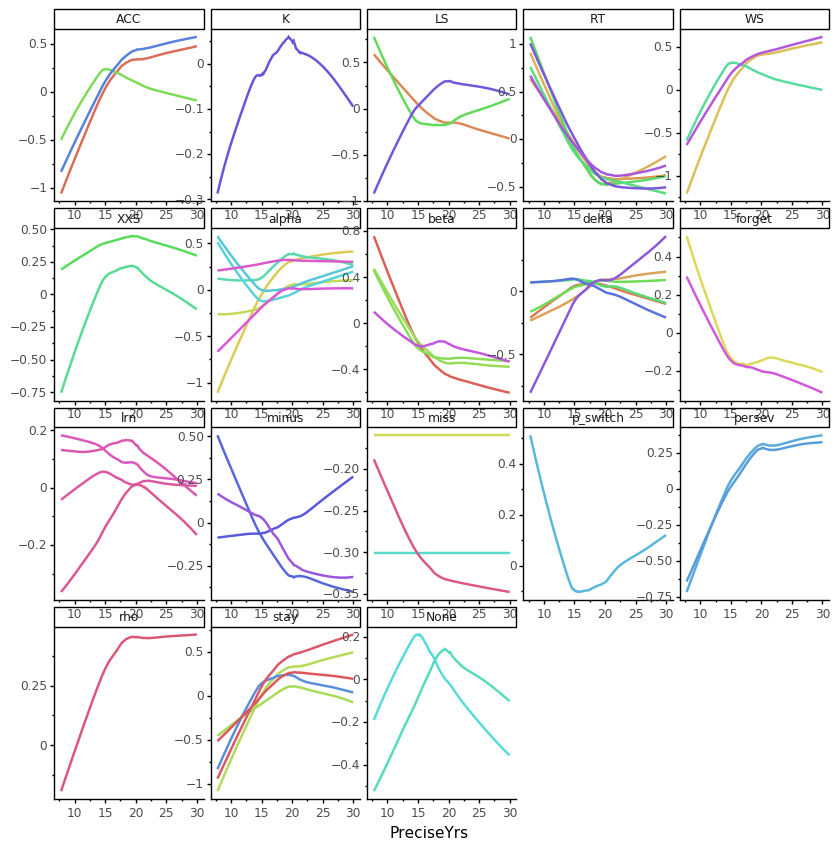

<ggplot: (-9223371909933079790)>


In [12]:
# Group features
gg.options.figure_size = (10, 10)
g = (gg.ggplot(
    all_data_long,#[all_data_long.category == 'lrn'],
    gg.aes('PreciseYrs', 'value', color='feature'))
#  + gg.geom_point(size=0.5, alpha=0.5)
 + gg.theme(legend_position='none')
 + gg.labs(y='', color='')
 + gg.geom_smooth()
 + gg.facet_wrap('~ category', scales='free')
)
print(g)

g_z = g
g_z.data = all_data_long_z

print(g_z)